In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
winners = pd.read_csv('./challenge-modified-data/winners_2019_2023.csv')

print(winners.count())

First Name             86
Last Name              86
Campus                 86
College                86
Major                  82
Proposal Name          86
Degree Level           63
Onboarded?             22
Year                   86
Bio                    29
interests              25
Interests 2            12
Soft Skills            26
Design Skills          18
AI Skills              23
Comp Sci Skills        21
Data Science Skills    17
Languages              18
dtype: int64


### Analysis

- 8 out of 13 winners over the past 5 years had at least 2 differnet majors on their team (62%)
- 7 out of 13 winners over the past 5 years had at least 3 different majors on their team (54%)

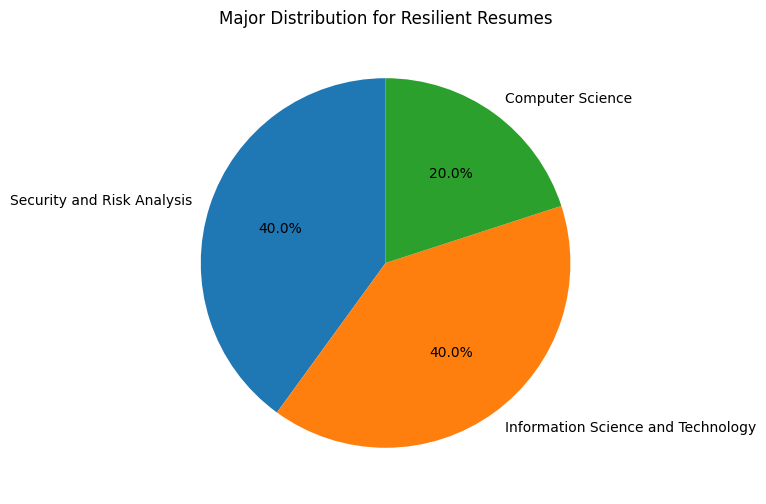

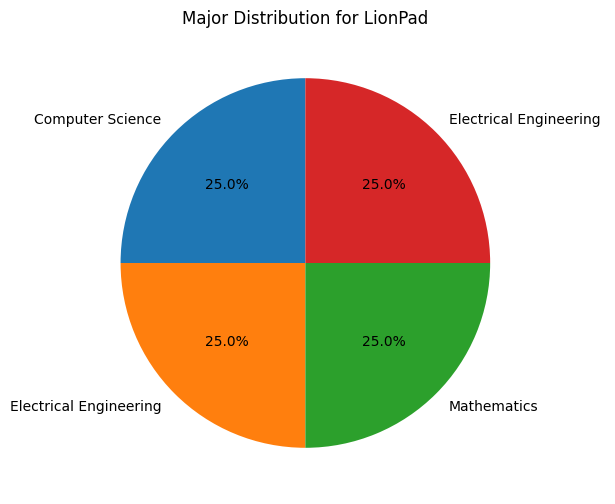

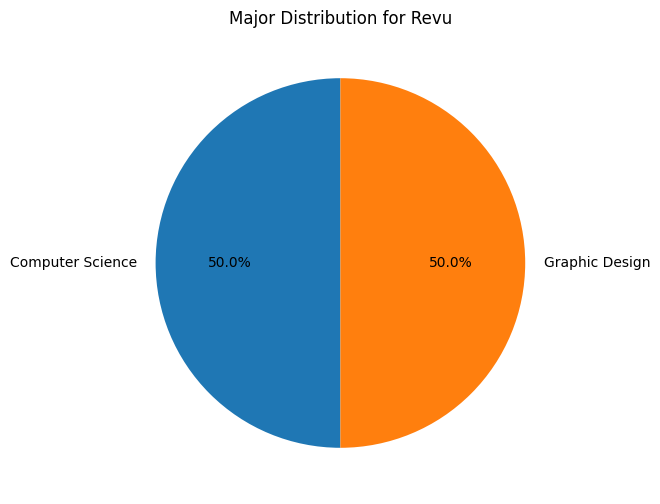

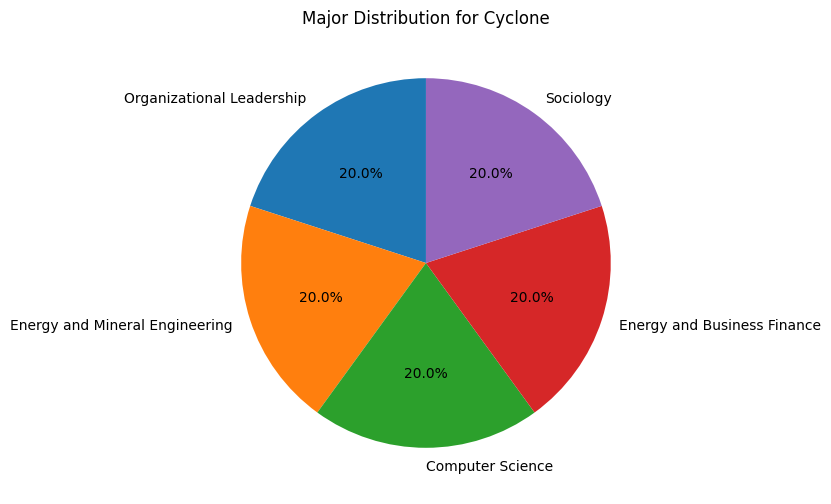

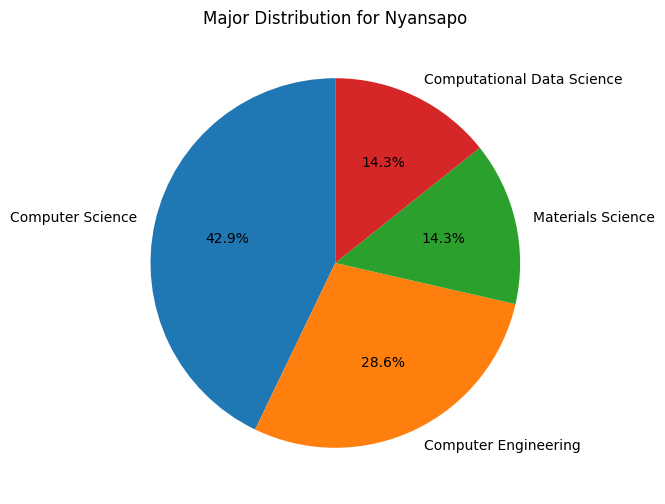

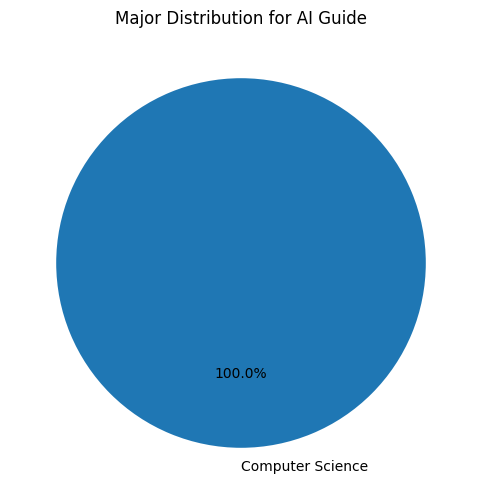

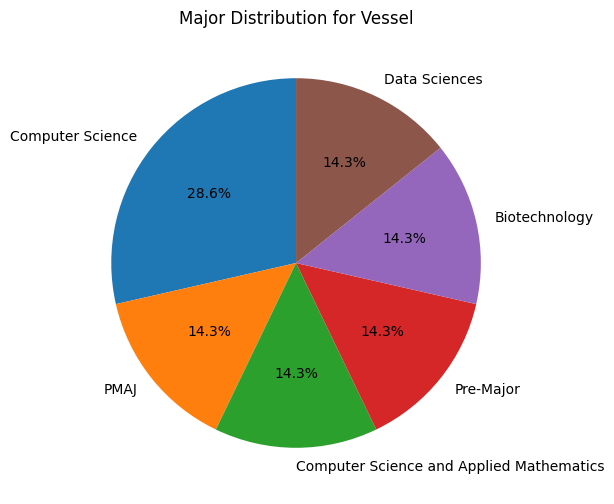

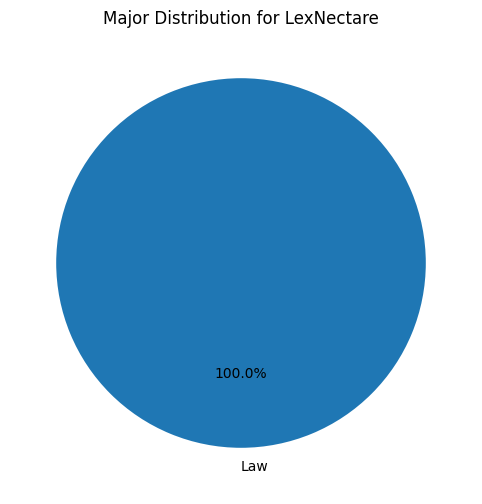

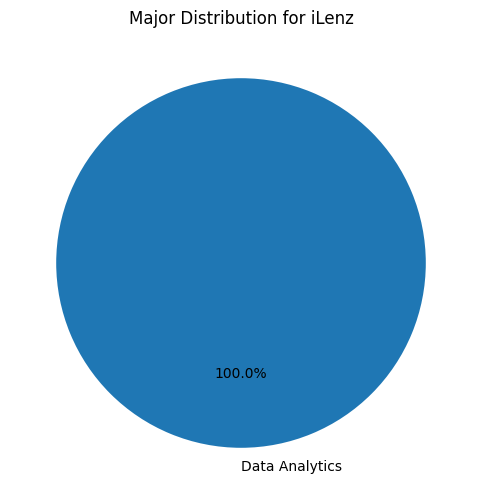

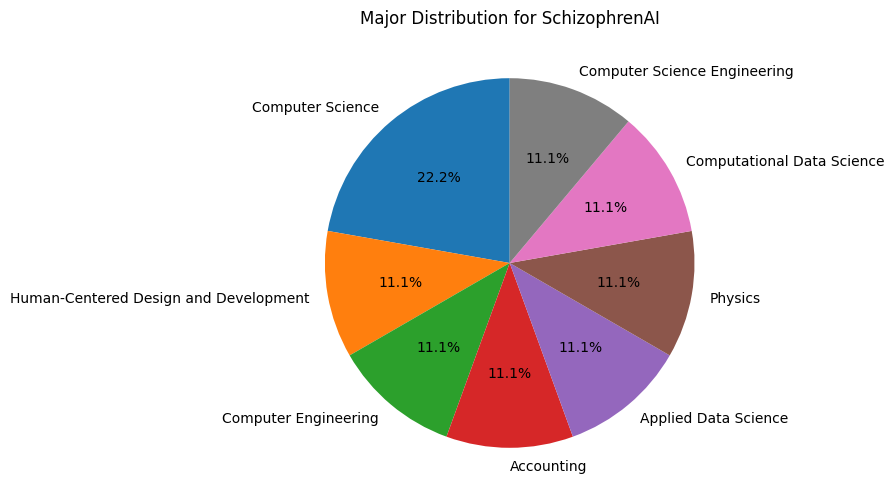

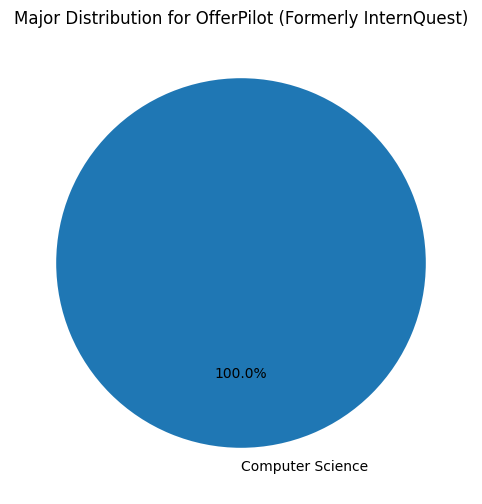

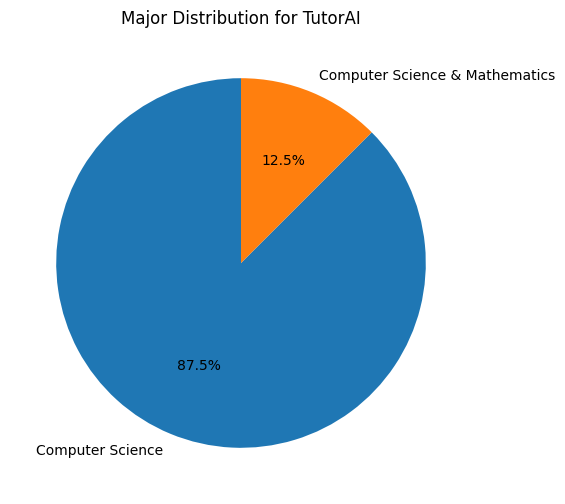

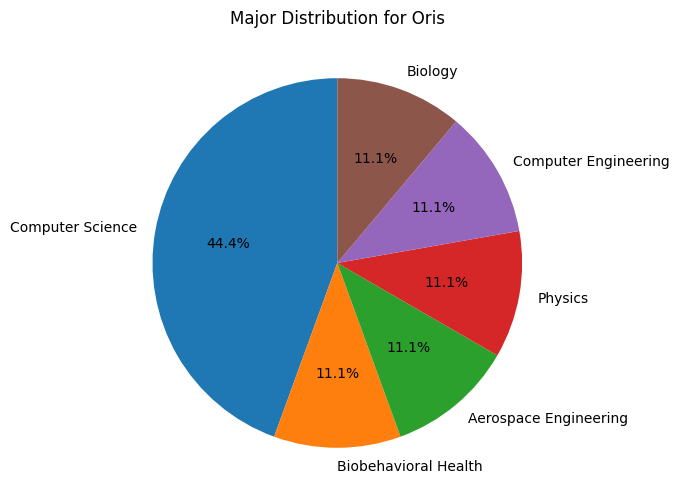

In [11]:

def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 6))
    data.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.ylabel('')
    plt.show()

teams = winners['Proposal Name'].unique()

for team in teams:
    team_data = winners[winners['Proposal Name'] == team]
    
    major_data = team_data['Major'].value_counts()
    plot_pie_chart(major_data, f'Major Distribution for {team}')
    

In [12]:
def combine_skills(row):
    skills = {
        'Interests 2': row['Interests 2'],
        'Soft Skills': row['Soft Skills'],
        'Design Skills': row['Design Skills'],
        'AI Skills': row['AI Skills'],
        'Comp Sci Skills': row['Comp Sci Skills'],
        'Data Science Skills': row['Data Science Skills'],
        'Languages': row['Languages']
    }

    return list(set(skills.values()))

winners['Combined Skills'] = winners.apply(combine_skills, axis=1)

winners_skills = winners.groupby('Proposal Name')['Combined Skills'].agg(lambda x: list(set([item for sublist in x for item in sublist]))).reset_index()

print(winners_skills)

winners_skills.to_csv('./challenge-modified-data/winners_skills.csv')

                        Proposal Name  \
0                            AI Guide   
1                             Cyclone   
2                          LexNectare   
3                             LionPad   
4                            Nyansapo   
5   OfferPilot (Formerly InternQuest)   
6                                Oris   
7                   Resilient Resumes   
8                                Revu   
9                       SchizophrenAI   
10                            TutorAI   
11                             Vessel   
12                              iLenz   

                                      Combined Skills  
0                                               [nan]  
1                                               [nan]  
2   [Natural Language Processing, Neural Networks,...  
3                                               [nan]  
4                                               [nan]  
5   [Java, JavaScript, Python, Chatbots, Computer ...  
6   [Chatbots, Computer Vision, K